In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline

# Adjusts the configuration of the plots I will create
matplotlib.rcParams['figure.figsize'] = (12,8)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Read data
df = pd.read_csv('/kaggle/input/movies/movies.csv')

/kaggle/input/movies/movies.csv


In [ ]:
# Show the first five columns
df.head()

In [ ]:
df.describe()

In [ ]:
# Find any missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {pct_missing}%')

In [ ]:
df.dtypes

In [ ]:
df['released'].str.replace('[a-z, A-Z, ()]','',regex=True)

In [ ]:
df['released'].str.replace('[a-z, A-Z, ()]', '', regex=True).str[-4:]

In [27]:
df['correctyear'] = df.released.str.replace('[a-z, A-Z, ()]', '', regex=True).str[-4:]
# df.head()

In [ ]:
# Order by
df.sort_values(by=['gross'], ascending = False)

In [28]:
# Remove scientific notations in gross and the decimal place in vots, budget, and runtime
df['gross'] = df['gross'].fillna(0).astype('int64')
df['votes']= df['votes'].fillna(0).astype('int64')
df['budget'] = df['budget'].fillna(0).astype('int64')
df['runtime'] = df['runtime'].fillna(0).astype('int64')

In [ ]:
df.head()

In [ ]:
# df['runtime'].astype('str').str[-1:].fillna(0).astype('int64')
a= df['runtime'].fillna(0)
b = a.astype('str').str[-1:].astype('int64')>0
c = np.mean(b.isnull())
print(c)


In [ ]:
# Set the system to show all rows
pd.set_option('display.min_rows', None)

In [32]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [ ]:
df.sort_values(by=['gross'], ascending = False)

In [ ]:
# Drop any duplicates
# df['company'].sort_values(ascending=False)
df['company'].drop_duplicates().sort_values(ascending=False)

In [ ]:
df.drop_duplicates()

In [ ]:
# Find out the correalation of gross with numeric values
# budget, votes, director,company 

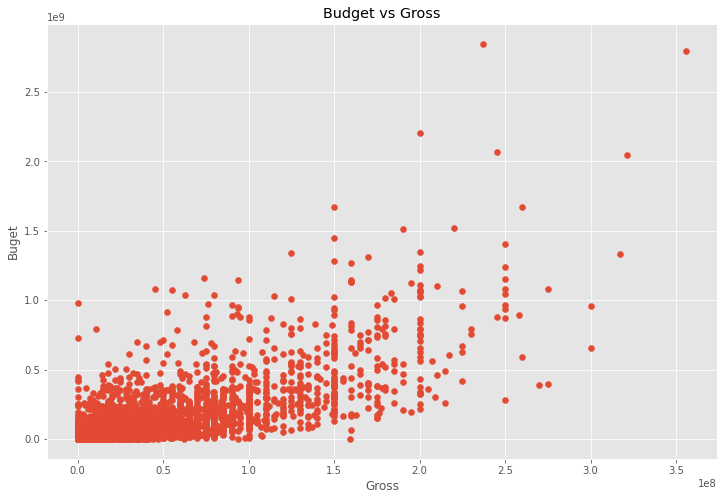

In [29]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross')
plt.xlabel('Gross')
plt.ylabel('Buget')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

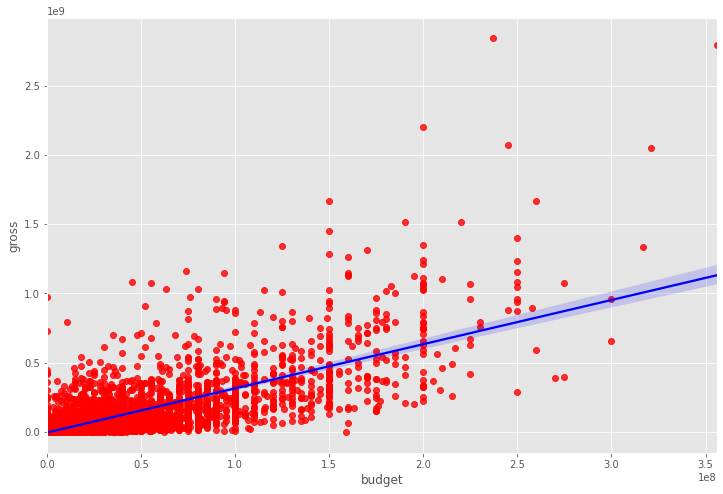

In [30]:
# Plot budget vs gross using seaborn
# Linear Regression
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [33]:
# correlation in a table
# The correlation includes only numeric values
# votes (63%) and budget (75%) are quite related to gross.

df.corr() # three method types : pearson (standard), kendall, and spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222427,0.309212,0.261900,0.116358
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.398387
votes,0.222427,0.409182,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.055665,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186392,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.398387,0.306984,0.268372,0.244339,1.000000


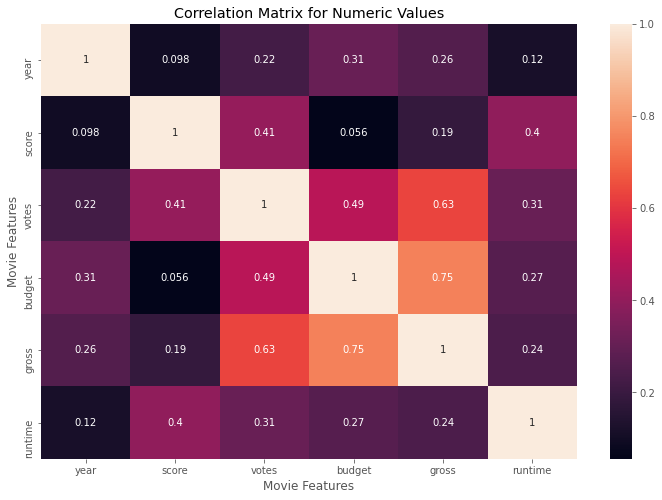

In [31]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Values')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [34]:
# Correlation - convert string to numeric
df_converted = df

for col_name in df_converted:
    if(df_converted[col_name].dtype == 'object'):
        df_converted[col_name] = df_converted[col_name].astype('category')
        df_converted[col_name] = df_converted[col_name].cat.codes

df_converted

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,6587,6,6,1980,1705,8.4,927000,2589,4014,1047,54,19000000,46998772,2319,146,0
1,5573,6,1,1980,1492,5.8,65000,2269,1632,327,55,4500000,58853106,731,104,0
2,5142,4,0,1980,1771,8.7,1200000,1111,2567,1745,55,18000000,538375067,1540,124,0
3,286,4,4,1980,1492,7.7,221000,1301,2000,2246,55,3500000,83453539,1812,88,0
4,1027,6,4,1980,1543,7.3,108000,1054,521,410,55,6000000,39846344,1777,98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18,1500,2289,2421,55,7000,0,-1,90,40
7664,1678,-1,4,2020,1107,4.7,36,774,2614,1886,55,0,0,539,90,40
7665,4717,-1,6,2020,193,5.7,29,2061,2683,2040,55,58750,0,941,0,40
7666,2843,-1,6,2020,2817,NaN,0,1184,1824,450,55,15000,0,-1,120,40


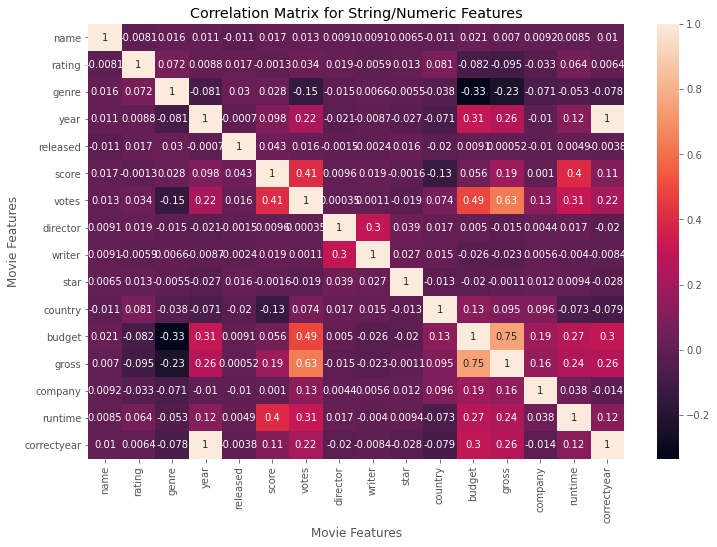

In [35]:
correlation_matrix = df_converted.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for String/Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [36]:
df_converted.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.008483,0.010225
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.064133,0.006403
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052914,-0.078210
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.116358,0.996397
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.015878,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.004852,-0.003775
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.398387,0.106295
votes,0.013038,0.033743,-0.145296,0.222427,0.015878,0.409182,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.632870,0.133457,0.306984,0.217782
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017062,-0.020385
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.004036,-0.008391
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.009418,-0.027606


In [37]:
corr_mat = df_converted.corr()

corr_pairs = corr_mat.unstack()

corr_pairs.head(30)

name    name           1.000000
        rating        -0.008069
        genre          0.016355
        year           0.011453
        released      -0.011311
        score          0.017097
        votes          0.013038
        director       0.009079
        writer         0.009081
        star           0.006472
        country       -0.010737
        budget         0.020548
        gross          0.006989
        company        0.009211
        runtime        0.008483
        correctyear    0.010225
rating  name          -0.008069
        rating         1.000000
        genre          0.072423
        year           0.008779
        released       0.016613
        score         -0.001314
        votes          0.033743
        director       0.019483
        writer        -0.005921
        star           0.013405
        country        0.081244
        budget        -0.081939
        gross         -0.095450
        company       -0.032943
dtype: float64

In [38]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head(30)

budget       genre         -0.334021
genre        budget        -0.334021
             gross         -0.234297
gross        genre         -0.234297
votes        genre         -0.145296
genre        votes         -0.145296
score        country       -0.133348
country      score         -0.133348
rating       gross         -0.095450
gross        rating        -0.095450
budget       rating        -0.081939
rating       budget        -0.081939
genre        year          -0.081261
year         genre         -0.081261
country      correctyear   -0.079009
correctyear  country       -0.079009
             genre         -0.078210
genre        correctyear   -0.078210
runtime      country       -0.073319
country      runtime       -0.073319
genre        company       -0.071067
company      genre         -0.071067
year         country       -0.070938
country      year          -0.070938
runtime      genre         -0.052914
genre        runtime       -0.052914
country      genre         -0.037615
g

In [49]:
sorted_pairs[(sorted_pairs>0.5) & (sorted_pairs<1)]

gross        votes          0.632870
votes        gross          0.632870
budget       gross          0.750157
gross        budget         0.750157
correctyear  year           0.996397
year         correctyear    0.996397
dtype: float64